# Optimization TL;DR:

What was killing us was the `dask.array.rechunk` because it was splitting the data into separate blocks
By not calling rechunk it keeps more of the data in a single chunk and thus faster reads.
It also looks like optimize is called internally during `dask.array.__getitem__` because optimize has little
to no effect on the retrieval times. It actually states this on their doc about slicing [here](https://docs.dask.org/en/latest/array-slicing.html#efficiency).

But this leaves the open question.... why is it choosing chunks the way it is for our data.
I feel like it _should_ be choosing chunks of (1, 1, 1, 1, Y, X) for example.

Maybe these are bad examples because they are random data but worth running this notebook on real data I guess.

In [1]:
from dask.array.random import random
from dask import optimize

### Rechunk + Optimize

In [2]:
img = random((6, 100, 4, 20, 200, 200))
img = img.rechunk((1, 1, 1, 1, 200, 200))
img = optimize(img)[0]
img

,Array,Chunk
Bytes,15.36 GB,320.00 kB
Shape,"(6, 100, 4, 20, 200, 200)","(1, 1, 1, 1, 200, 200)"
Count,103728 Tasks,48000 Chunks
Type,float64,numpy.ndarray


In [3]:
not_opt_plane = img[0, 0, 0, 0, :]
not_opt_plane

dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(200, 200), chunktype=numpy.ndarray>

In [4]:
opt_plane = optimize(img[0, 0, 0, 0, :])[0]
opt_plane

dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(200, 200), chunktype=numpy.ndarray>

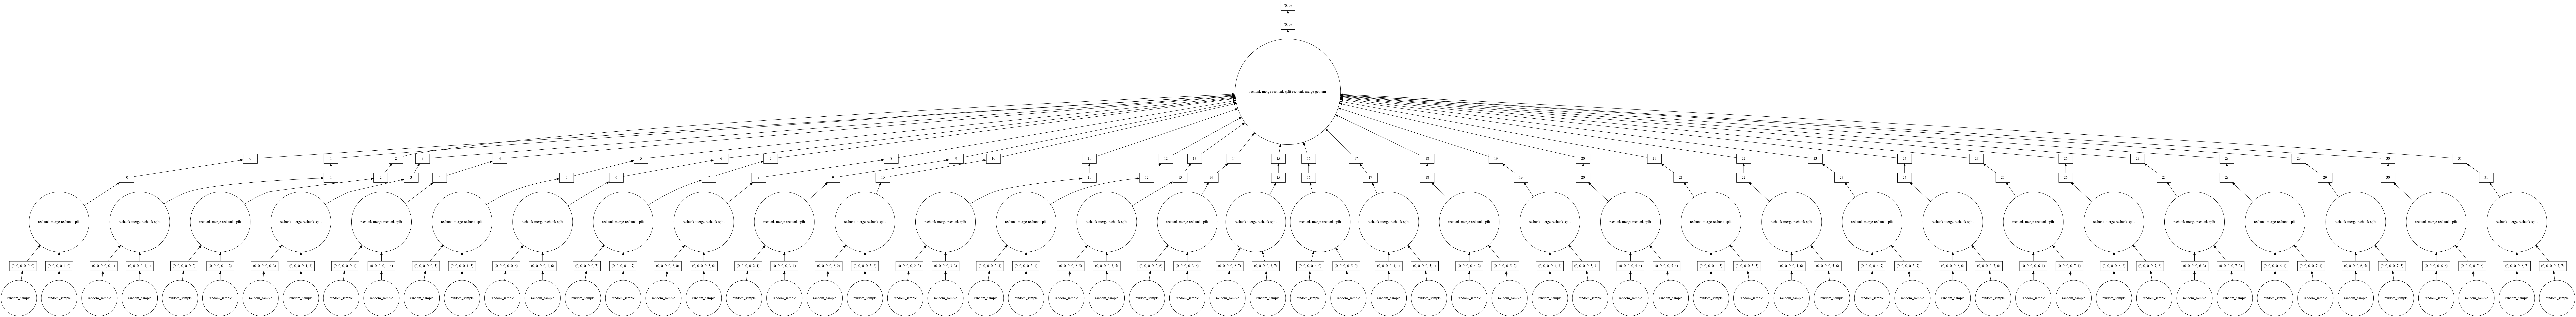

In [5]:
opt_plane.visualize()

In [6]:
%timeit not_opt_plane.compute()

1.39 s ± 32.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit opt_plane.compute()

1.39 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Just Optimize

In [8]:
img = random((6, 100, 4, 20, 200, 200))
img = optimize(img)[0]
img

,Array,Chunk
Bytes,15.36 GB,60.00 MB
Shape,"(6, 100, 4, 20, 200, 200)","(6, 25, 4, 20, 25, 25)"
Count,256 Tasks,256 Chunks
Type,float64,numpy.ndarray


In [9]:
not_opt_plane = img[0, 0, 0, 0, :]
not_opt_plane

dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>

In [10]:
opt_plane = optimize(img[0, 0, 0, 0, :])[0]
opt_plane

dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>

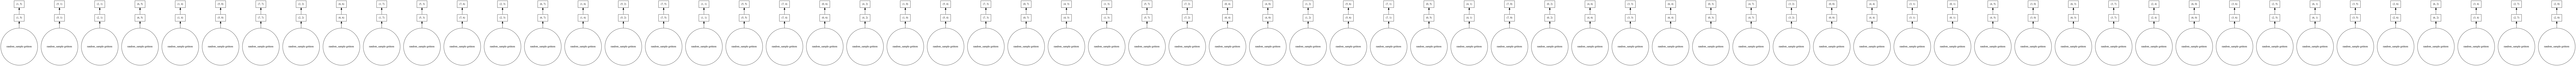

In [11]:
opt_plane.visualize()

In [12]:
%timeit not_opt_plane.compute()

602 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit opt_plane.compute()

604 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Just Raw

In [14]:
img = random((6, 100, 4, 20, 200, 200))
img

,Array,Chunk
Bytes,15.36 GB,60.00 MB
Shape,"(6, 100, 4, 20, 200, 200)","(6, 25, 4, 20, 25, 25)"
Count,256 Tasks,256 Chunks
Type,float64,numpy.ndarray


In [15]:
not_opt_plane = img[0, 0, 0, 0, :]
not_opt_plane

dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>

In [16]:
opt_plane = optimize(img[0, 0, 0, 0, :])[0]
opt_plane

dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>

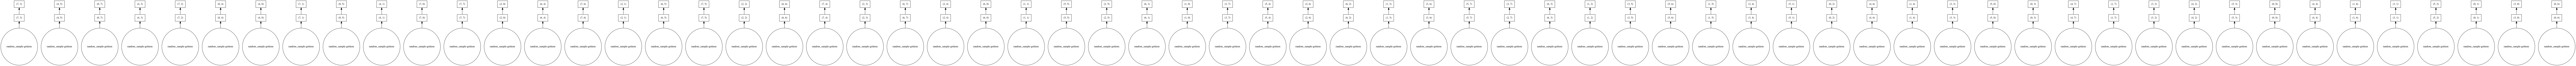

In [17]:
opt_plane.visualize()

In [18]:
%timeit not_opt_plane.compute()

607 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit opt_plane.compute()

607 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
